# Final Project Part 4: Modeling Performance


In [2]:
##import the needed Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # Matlab-style plott
import seaborn as sns
color = sns.color_palette(sns.hls_palette(8, l=.3, s=.8))
from sklearn import feature_selection, linear_model, metrics#scikit-learn- Regression
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import linear_model, metrics
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('cleandata.csv')
df.head()

,Unnamed: 0,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,0,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
2,2,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
3,3,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
4,4,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8


In [6]:
del df['Unnamed: 0']
del df['reordered']
df.head()

,order_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
2,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
3,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
4,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8


In [7]:
len(df)

33819106

In [8]:
#splitting up the orders by Set
z=int(len(df)*0.8)
df_prior = df[0:500000]
df_train = df[500000:1000000]




In [9]:
#Edit Data to create first regression & See correlations based on departments

columns_to_keep = ['basket_count', 'department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']
data = df_prior[columns_to_keep]


/Users/alastra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


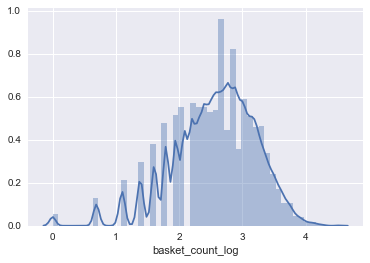

In [10]:
data['basket_count_log'] = np.log(data.basket_count.values)
sns.distplot(data['basket_count_log'])

In [11]:
X_train = data.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y_train = data["basket_count_log"]

alphas = np.logspace(-10, 10, 21)
gs = GridSearchCV(
    cv=10,
    estimator = linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False], },
    scoring='mean_squared_error')

gs.fit(X_train, y_train)

/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [12]:
gs.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
-gs.best_score_

0.14410141396282597

In [14]:
gs.grid_scores_

/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.14410, std: 0.00279, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -0.23119, std: 0.00668, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -0.14410, std: 0.00279, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -0.23119, std: 0.00668, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -0.14410, std: 0.00279, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -0.23119, std: 0.00668, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -0.14410, std: 0.00279, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -0.23119, std: 0.00668, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -0.14410, std: 0.00279, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -0.23119, std: 0.00668, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -0.14410, std: 0.00279, params: {'alpha': 1.0000000000000001e-05, 'fit_intercept': Tru

In [16]:
columns_to_keepa = ['basket_count', 'department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']
datatest = df_train[columns_to_keepa]

/Users/alastra/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


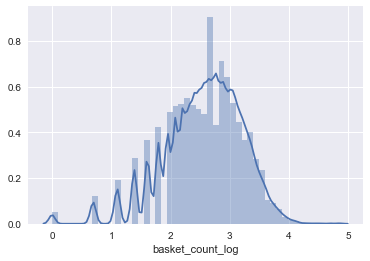

In [17]:
datatest['basket_count_log'] = np.log(datatest.basket_count.values)
sns.distplot(datatest['basket_count_log'])

In [19]:
X_test = datatest.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y_test = datatest["basket_count_log"]

In [20]:
predictions = gs.best_estimator_.predict(X_test)

In [21]:
print predictions

[ 2.86656309  2.86656309  2.86656309 ...,  2.78890215  2.78890215
  2.78890215]


In [24]:
mean_squared_error(y_test, predictions)

0.14740478309119431

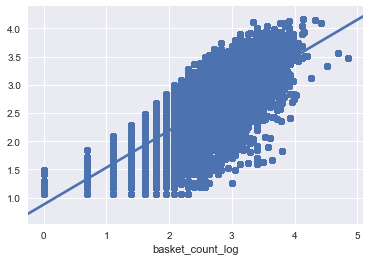

In [23]:
sns.regplot(y_test, predictions)

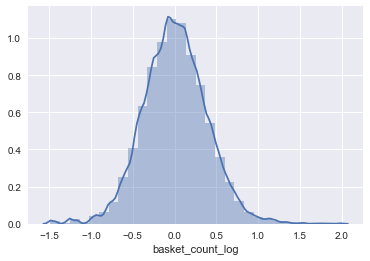

In [25]:
sns.distplot(y_test-predictions, bins=30)

In [26]:
features = X_train.columns
feature_coef = gs.best_estimator_.coef_
features_df = pd.DataFrame({'Features': features, 'Importance': feature_coef})
features_df.sort_values('Importance', inplace=True, ascending=False)

features_df

,Features,Importance
1,department_produce,0.425785
13,department_dairy eggs,0.366969
0,department_snacks,0.237330
6,department_missing,0.216906
4,department_pantry,0.205077
19,department_babies,0.195597
17,department_beverages,0.192859
14,department_canned goods,0.192791
12,department_deli,0.188247
10,department_frozen,0.186905
